In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, InputLayer
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets


In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
#60000개의 28x28 형태의 데이터

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


합성곱(convolution) 신경망 레이어 케라스에서 제공하는 합성곱 레이어 중 영상처리에 주로 사용되는 Conv2D 레이어

Conv2D(1, (2, 2), padding = 'valid', input_shape = (4, 4, 1), activation = 'relu')

첫번째 인자: 합성곱 필터의 숫자

두번째 인자: 합성곱 커널의 (행,열)

padding : 경계 처리 방법

valid : 출력사이즈는 입력 사이즈보다 작아집니다.

same : 출력 이미지 사이즈와 입력 사이즈가 동일합니다.

input_shape : 입력형태, (행, 열, 채널 수); 채널은 흑백이면 1, 컬러면 3입니다.

activation : 활성화 함수를 설정

In [3]:
label = ['Tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'Ankelboot']

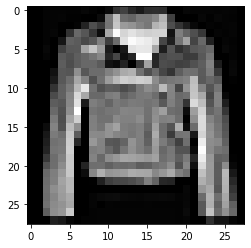

4
[[  0   0   4   4   4   3   3   7   3   0  10  50  65  41  25  45  46  44
    0   0   7   5   5   5   4   5   4   0]
 [  0   0   4   4   5   2   2   0   0  11 119 191 107 100 122 121 135 179
   64   0   0   0   7   2   7   4   3   0]
 [  0   0   4   4   0   0   4  35  79  58 117 197 154 147 131 119 179 191
   78  53  29   8   0   4   2   4   5   0]
 [  0   0   4   6   0  50 104  86  55  13 168 251 213 226 214 207 212 211
   19 126  99  79  55   0   5   3   5   0]
 [  0   0   4   0  21  98  91  72  87 127  62 108 224 251 241 235 218  71
   31 116 162  68 104  33   0   5   3   0]
 [  0   0   8   0  65  88  89 163 197 156  27   0  24 225 232 231 167  30
   85  49  65  87  93 104   0   8   4   0]
 [  0   0   5   0  89  80  94 103 117 135  38  70  15  35 255 255  37  74
   82  80  59  61  88 118   0   0   4   0]
 [  0   0   0   0  93  77  93 104 104  91  19  12  34   0  59 164  41  77
   73  64  67  82  94 130  29   0   7   0]
 [  0   0   0  17  88  85 143  87 108 108 129 146 170 177 113 

In [4]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [5]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [6]:
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
x_train = X_train / 255.0
x_test = X_test /255.0
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbrwTBv%2Fbtq4XcCIwBr%2FcD9xtpG49Ihd4MiwJG6Sk1%2Fimg.png" width="600">
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F999408355BC97F062C6390">
<img src = "https://pbs.twimg.com/media/D0naBeoVsAAy957?format=png&name=medium" width="600">
<img src = "https://taewanmerepo.github.io/2018/01/cnn/conv2.jpg" width="600">

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same', input_shape=(28, 28, 1)),) # input_shape 컬러사진인 경우 뒤에 1 이 3(RGB)
# padding 이미지를 입력과 출력 사이즈를 같게 감싸줌
# 패딩을 사용하는 이유는 패딩을 사용하지 않을 경우,
# 데이터의 Spatial 크기는 Conv Layer를 지날 때 마다 작아지게 되므로,
# 가장자리의 정보들이 사라지는 문제가 발생하기 때문에 패딩을 사용하며,
# 주로 합성곱 계층의 출력이 입력 데이터의 공간적 크기와 동일하게 맞춰주기 위해 사용한다.
model.add(MaxPool2D(padding='same', pool_size=(2, 2)))
# MaxPool은 Conv와 함께 다님, MaxPool에서 padding same은 입출력 크기를 동일하게 맞춰주지 않음
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                 activation='relu'))
model.add(MaxPool2D(padding='same', pool_size=(2, 2)))
model.add(Flatten())
# Dense layer에 들어갈 이미지 픽셀값을 일렬로 reshape 해준다
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) # 다중분류기에서는 분류클래스 만큼 출력에 설정, 다중분류기 = softmax(확률 값으로)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [19]:
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics='accuracy')
#다중분류기에서는 loss 'categoricla_crossentropy', metrics(척도)로 'accuracy' 사용 / 이중분류기일때만 'binary_accuracy'

In [20]:
fit_hist = model.fit(x_train, y_train,
                     batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 33s 5ms/step - loss: 0.6400 - accuracy: 0.7644 - val_loss: 0.3967 - val_accuracy: 0.8573
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3881 - accuracy: 0.8596 - val_loss: 0.3190 - val_accuracy: 0.8842
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3310 - accuracy: 0.8793 - val_loss: 0.2846 - val_accuracy: 0.8952
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2993 - accuracy: 0.8915 - val_loss: 0.2763 - val_accuracy: 0.8968
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2746 - accuracy: 0.8994 - val_loss: 0.2693 - val_accuracy: 0.9023
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2578 - accuracy: 0.9050 - val_loss: 0.2450 - val_accuracy: 0.9098
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2431 - accuracy: 0.9104 - val_loss: 0.2441 - val_accuracy: 0.9111
Epoch

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test accuracy :', score[1])

Final test accuracy : 0.9223999977111816


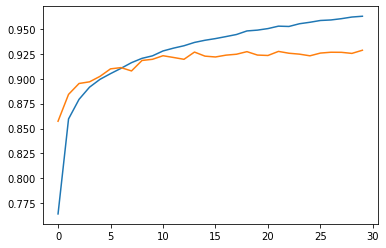

In [23]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

dress
[[1.20335519e-02 3.67869681e-04 4.15750481e-02 5.67752481e-01
  1.04084305e-01 5.66881045e-06 2.73926139e-01 1.19874439e-05
  2.41310423e-04 1.74565264e-06]]
dress


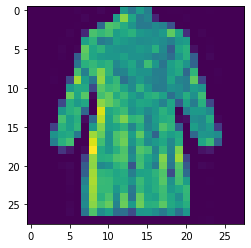

In [24]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 28, 28, 1))
print(pred)
print(label[np.argmax(pred)])